In [1]:
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive # gdrive 연동
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_over_sampling.csv', encoding='cp949') # oversampling 된 것!
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0
3,1,1,111,70,72,20.2,0
4,1,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
1481319,0,25,120,80,78,27.9,1
1481320,0,27,150,74,133,32.0,1
1481321,1,25,120,70,118,26.9,1
1481322,0,20,136,68,93,21.5,1


In [4]:
df.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
Dis      1481324
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   Dis     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


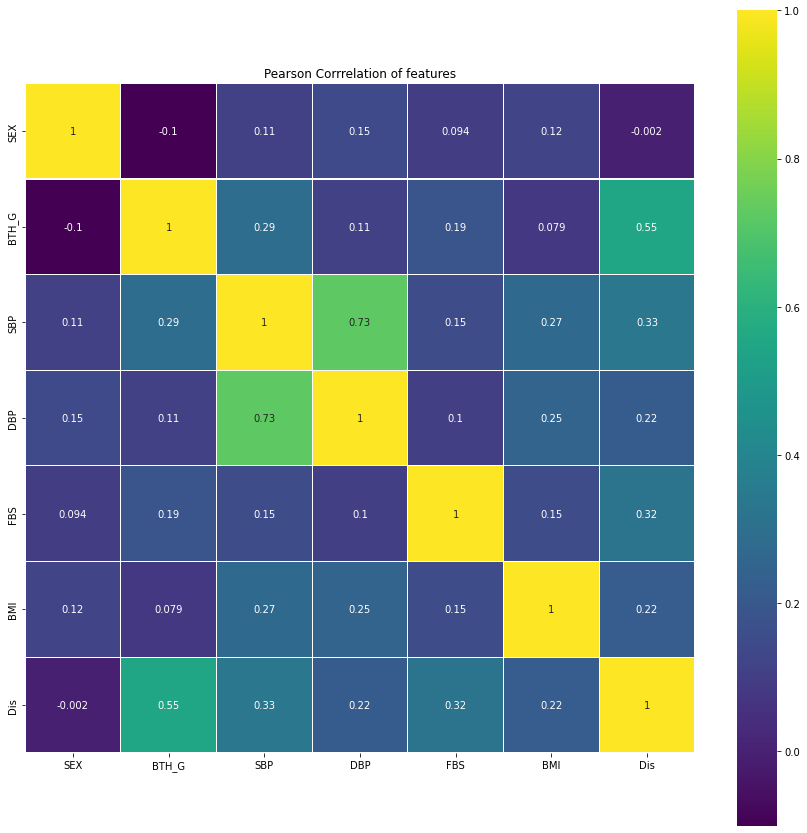

In [6]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

수축기 혈압(SBP)와 이완기 혈압(DBP)의 상관관계는 0.74가 나왔고 나머지 데이터에서는 유의미함을 발견하지 못함

질병과 birthday 도 0.49의 상관관계가 나옴 (나이가 들수록 질병이 잘 걸린다.)

In [17]:
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Dis'],df['Dis'],  stratify=df['Dis'], shuffle=True, test_size=0.9, random_state=11)

# 
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.89, shuffle=True) # validation은 사용하지 않음


print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(148132, 6)
(148132,)
(1186541, 6)
(1186541,)
(146651, 6)
(146651,)


In [18]:
X_train.shape

(148132, 6)

In [19]:
X_test.shape

(146651, 6)

In [20]:
y_train.shape

(148132,)

In [21]:
y_test.shape

(146651,)

In [22]:
from sklearn.svm import SVC

svc = SVC().fit(X_train,y_train) # default값 1

print("train score : {}".format(svc.score(X_train, y_train)))

predict_y = svc.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))
print("test score : {}".format(svc.score(X_test, y_test)))

train score : 0.7943320821969595
              precision    recall  f1-score   support

           0       0.82      0.76      0.78     73478
           1       0.77      0.83      0.80     73173

    accuracy                           0.79    146651
   macro avg       0.79      0.79      0.79    146651
weighted avg       0.79      0.79      0.79    146651

test score : 0.7925073814702934


**Upsampling된 Data**

train, test score 0.8이상으로 성능이 괜찮음

In [23]:
print(confusion_matrix(y_test, predict_y))


[[55520 17958]
 [12471 60702]]


In [24]:
# due to overfitting the test accuracy is very less as compared to the training accuracy.
#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately on the same scale and than see the performance
#Scale the data points using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
# Now fit the model on scaled data and precdict

svc = SVC()
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

# 하이퍼 파라미터 조정해야 할 부분 : 주말에 진행하여 업데이트 할 예정

In [ ]:
# Scaling the data made a huge difference.But now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy.
# change C or gamma to fit a more complex model.

# try C = 1000
svc = SVC(C=1000)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

In [ ]:

# try for C=500
# try C = 1000
svc = SVC(C=500)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

In [ ]:
# Use smart way of finding the optimum value of C and kernel value for the optimum accuracy.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
import numpy as np
# Use smart way of finding the optimum value of C and kernel value for the optimum accuracy.
import multiprocessing

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[10,100,200,300,400,500,600,700,800,900,1000] 
                }
            ]

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )


In [ ]:
grid_search.fit(scaled_X_train, y_train)


In [ ]:
grid_search.best_estimator_


In [ ]:
grid_search.best_score_


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['normal', 'abnormal']))


y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Dis']))